`matplotlib`의 기본 플롯은 결코 "전문가"처럼 보이지 않기 때문에 사람들은 다른 `Plotly`와 같은 다른 시각화 라이브러리를 사용하고는 합니다. 그러나 대부분의 경우 `matplotlib`의 사용자 정의 기능을 사용한다면 충분히 전문가 같은 시각화를 할 수 있습니다.

아래의 예시는 모두 matplotlib을 사용하여 만들어졌고 두 번째 플롯이 첫번째 플롯보다 훨씬 더 우아하고, 유익하며, 매력적으로 보입니다.
왜냐하면 아래의 조건을 충족하기 때문이죠.

- 제목과 부제는 메세지를 전달하는 데 크게 도움이 됩니다.
- 주석은 기본 플롯에 없는 추가적인 중요 정보를 제공합니다.
- 일부 그래프를 굵게 표현해 시각적 주의를 끌고 중요성을 강조합니다.

좋은 시각화는 보는 사람의 입장에서 최소한의 노력이 필요해야 한다는 것입니다. 따라서 전문가 같은 시각화를 위해 추가적인 노력을 기울이는 것이 중요합니다.

> 추가적인 설명 없이도 시각화 자료가 올바른 스토리를 전달하도록 하세요.

## 기본 matplotlib 플랏

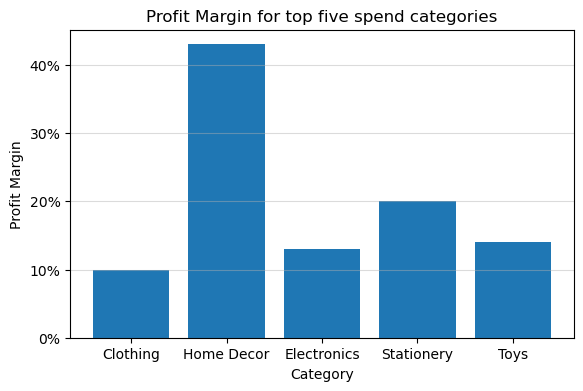

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd


def percent_formatter(x, pos):
    return f"{x * 100:.0f}%"


# Dummy Data
df = pd.DataFrame(
    [
        ["Clothing", 0.1],
        ["Home Decor", 0.43],
        ["Electronics", 0.13],
        ["Stationery", 0.2],
        ["Toys", 0.14],
    ],
    columns=["Spend_Category", "Profit_Margin"],
)

# Define figure
fig, ax = plt.subplots(figsize=(6.5, 4))

# Create bar plot
plt.bar(df["Spend_Category"], df["Profit_Margin"])

# Convert y-axis labels to percentage
ax.yaxis.set_major_formatter(mtick.FuncFormatter(percent_formatter))

# show grid
plt.grid(axis="y", alpha=0.45)

# set title and and x-y label
plt.title("Profit Margin for top five spend categories")
plt.ylabel("Profit Margin")
plt.xlabel("Category")

plt.show()

## 사용자 정의를 곁들인 matplotlib 플랏

/tmp/ipykernel_150474/1225230903.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df['Spend_Category'], fontsize=14, fontweight='bold')


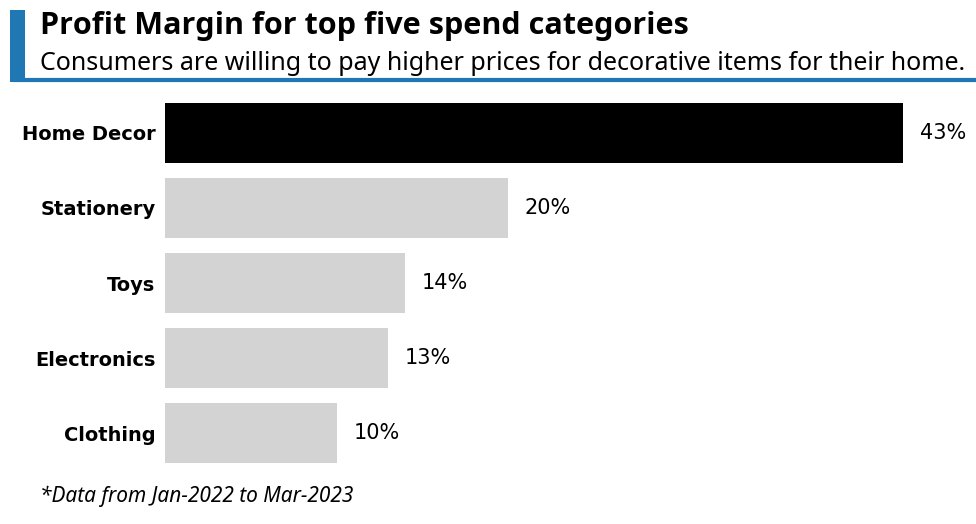

In [3]:
# 원본 데이터를 생성하고, 'Profit_Margin' 기준으로 오름차순 정렬합니다.
df = pd.DataFrame(
    [
        ["Clothing", 0.1],
        ["Home Decor", 0.43],
        ["Electronics", 0.13],
        ["Stationery", 0.2],
        ["Toys", 0.14],
    ],
    columns=["Spend_Category", "Profit_Margin"],
)

df = df.sort_values("Profit_Margin", ascending=True, ignore_index=True)

fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor("white")  # Figure 전체 배경색
ax.set_facecolor("white")  # 플롯 영역(Axes) 배경색

# 공통 폰트 설정
TITLE_FONT = "Noto Sans"

# 메인 제목
fig.text(
    0,
    0.91,  # x, y 위치 (Figure 좌측 하단이 0,0)
    "Profit Margin for top five spend categories",
    fontfamily=TITLE_FONT,
    fontweight="bold",
    fontsize=22,
    ha="left",  # 수평 왼쪽 정렬
)

# 부제목
fig.text(
    0,
    0.85,
    "Consumers are willing to pay higher prices for decorative items for their home.",
    fontfamily=TITLE_FONT,
    fontsize=18,
    ha="left",
)

# 막대 색상 동적 생성 (마지막 값만 검은색으로 강조)
n_bars = len(df)
bar_colors = ["lightgray"] * (n_bars - 1) + ["black"]

# 수평 막대 그래프 그리기 (ax 객체 사용)
bars = ax.barh(df["Spend_Category"], df["Profit_Margin"], color=bar_colors, edgecolor="none")

# 각 막대에 백분율(%) 형식으로 값을 표시합니다.
ax.bar_label(bars, labels=[f"{x:.0%}" for x in bars.datavalues], padding=12, fontsize=15)

# y축 여백을 설정하여 그래프가 잘리지 않게 합니다.
ax.margins(y=0.14)

# 모든 축(spines)을 보이지 않게 처리
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# x축 눈금과 레이블 제거
ax.set_xticks([])

# y축 눈금선 제거 및 레이블 폰트 설정
ax.tick_params(axis="y", left=False)  # y축 눈금선(tick line) 제거
# y축 레이블(Spend_Category) 폰트 설정 (plt.yticks 대신 ax 메서드 사용)
ax.set_yticklabels(df["Spend_Category"], fontsize=14, fontweight="bold")

# (1) 제목 아래 파란색 구분선
ax.plot(
    [-0.025, 0.94],  # 선의 시작/끝 x좌표
    [0.8335, 0.8335],  # 선의 시작/끝 y좌표
    transform=fig.transFigure,  # Figure 기준 좌표계 사용
    clip_on=False,  # Figure 영역 밖으로 그려도 자르지 않음
    color="tab:blue",
    linewidth=3,
)

# (2) 왼쪽 파란색 강조 사각형
ax.add_patch(
    plt.Rectangle(
        (-0.03, 0.95),  # 사각형 좌측 하단 (x, y)
        0.015,
        -0.12,  # 너비, 높이
        facecolor="tab:blue",
        transform=fig.transFigure,
        clip_on=False,
        linewidth=0,
    )
)

# (3) 각주(Footnote)
fig.text(
    0,
    0.13,
    "*Data from Jan-2022 to Mar-2023",
    fontfamily=TITLE_FONT,
    fontstyle="italic",
    fontsize=15,
    ha="left",
)

plt.show()

# 플랏에 추가 정보 제공하기

데이터 시각화를 하다보면 종종 특히 중요한 부분들이 있기 마련입니다. 그리고 훌륭한 데이터 스토리텔러는 플롯이 보는 사람의 시선을 이러한 핵심 영역으로 유도하도록 만들어야 합니다. matplotlib에서는 `annotate()`를 사용해 주석을 추가할 수 있습니다.

## 주석 플롯(Annotated Plot)
주석 플롯은 플롯에 설명 텍스트를 추가하여, 보는 사람의 시선을 특정 영역으로 유도하고 이해를 돕도록 합니다.

/tmp/ipykernel_150474/1802525514.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data = yfinance.download(tickers="^GSPC", start='2020-01-01',
[*********************100%***********************]  1 of 1 completed


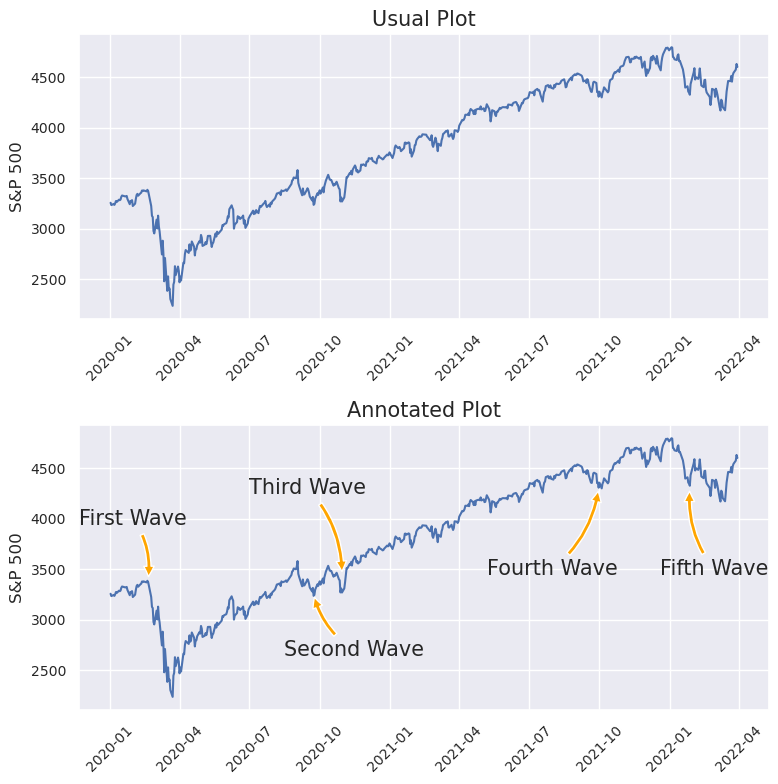

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance

# Matplotlib의 날짜 변환기를 pandas용으로 등록 (호환성 향상)
pd.plotting.register_matplotlib_converters()

sns.set()

# -- 0. 데이터 준비 --
# yfinance 데이터 다운로드 (두 플롯에서 공유)
raw_data = yfinance.download(tickers="^GSPC", start="2020-01-01", end="2022-03-31", interval="1d")

# -- 1. Figure 및 2개의 Subplots 생성 (2행 1열) --
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# 명확성을 위해 각 subplot을 별도 변수에 할당
ax1 = axs[0]
ax2 = axs[1]

# -- 2. 첫 번째 플롯 (ax1) - Usual Plot --
ax1.plot(raw_data.index, raw_data.Close)

# plt.xlabel -> ax1.set_xlabel
ax1.set_xlabel("")
ax1.set_ylabel("S&P 500", size=12)
# plt.title -> ax1.set_title
ax1.set_title("Usual Plot", size=15)

# plt.xticks -> ax1.tick_params
ax1.tick_params(axis="x", labelsize=10, rotation=45)
ax1.tick_params(axis="y", labelsize=10)


# -- 3. 두 번째 플롯 (ax2) - Annotated Plot --
ax2.plot(raw_data.index, raw_data.Close)

# First peak annotation
ax2.annotate(
    "First Wave",
    (pd.to_datetime("2020-02-20"), 3400),
    (pd.to_datetime("2020-01-31"), 4000),
    size=15,
    va="center",
    ha="center",
    arrowprops={"arrowstyle": "simple", "facecolor": "orange", "connectionstyle": "arc3,rad=-0.2"},
)

# Second peak annotation
ax2.annotate(
    "Second Wave",
    xy=(pd.to_datetime("2020-09-23"), 3250),
    xytext=(pd.to_datetime("2020-11-15"), 2700),
    size=15,
    va="center",
    ha="center",
    arrowprops={"arrowstyle": "simple", "facecolor": "orange", "connectionstyle": "arc3,rad=-0.2"},
)

# Third peak annotation
ax2.annotate(
    "Third Wave",
    xy=(pd.to_datetime("2020-10-30"), 3450),
    xytext=(pd.to_datetime("2020-09-15"), 4300),
    size=15,
    va="center",
    ha="center",
    arrowprops={"arrowstyle": "simple", "facecolor": "orange", "connectionstyle": "arc3,rad=-0.2"},
)

# Fourth peak annotation
ax2.annotate(
    "Fourth Wave",
    xy=(pd.to_datetime("2021-09-30"), 4300),
    xytext=(pd.to_datetime("2021-07-31"), 3500),
    size=15,
    va="center",
    ha="center",
    arrowprops={"arrowstyle": "simple", "facecolor": "orange", "connectionstyle": "arc3,rad=-0.2"},
)

# Fifth peak annotation
ax2.annotate(
    "Fifth Wave",
    xy=(pd.to_datetime("2022-01-27"), 4300),
    xytext=(pd.to_datetime("2022-02-28"), 3500),
    size=15,
    va="center",
    ha="center",
    arrowprops={"arrowstyle": "simple", "facecolor": "orange", "connectionstyle": "arc3,rad=-0.2"},
)

# plt.xlabel -> ax2.set_xlabel
ax2.set_xlabel("")
ax2.set_ylabel("S&P 500", size=12)
# plt.title -> ax2.set_title
ax2.set_title("Annotated Plot", size=15)

# plt.xticks -> ax2.tick_params
ax2.tick_params(axis="x", labelsize=10, rotation=45)
ax2.tick_params(axis="y", labelsize=10)


# -- 4. 전체 Figure 표시 --
# 플롯들이 겹치지 않도록 레이아웃 자동 조정
plt.tight_layout()
plt.show()

또 다른 추가 정보를 제공하는 또 다른 훌륭한 방법은 플롯에 확대된 그림을 추가하는 것입니다. matplotlib에서는 `indicate_inset_zoom()`을 사용하여 수행할 수 있습니다. 이 함수는 표시 상자(indicator box)를 추가하며, 더 명확하게 보기 위해 확대(zoom-in)할 수 있습니다. 삽입된 플롯은 다른 matplotlib 플롯과 동일하게 취급됩니다. 따라서 필요하다면 축 레이블을 추가할 수도 있습니다.

# [스파크라인](https://www.blog.dailydoseofds.com/p/sparklines-the-hidden-gem-of-data)(Sparkline plot) 플롯

> 훨씬 더 많은 관심을 받을 자격이 있는 데이터 시각화의 숨겨진 보석

Jupyter에서 데이터 분석 작업을 수행할 때, 우리는 대부분 독립형 차트와 시각 자료를 만듭니다. 물론, 그것이 잘못된 것은 아니지만  **스파크라인(Sparklines)**이라고 불리는 시각화는 공간을 많이 차지하지 않으면서 데이터를 시각화하는 매우 우아한 방법을 제공합니다.

스파크라인은 전통적인 플롯과 달리 축 눈금(axis ticks)과 레이블을 생성하지 않습니다. 제가 스파크라인을 사용하는 것을 선호하는 가장 멋진 방법 중 하나는 아래에서 보듯이 DataFrame의 셀에 스파크라인을 추가하는 것입니다.

,Name,Day Price History,Hourly Trade Volume
0,APPL,,
1,MSFT,,
2,GOOG,,
3,META,,

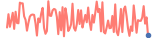
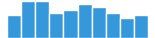
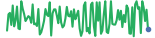
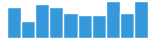
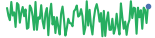
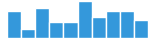
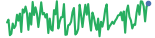
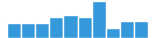

In [ ]:
# HTML 렌더링 및 base64 인코딩을 위한 라이브러리
from base64 import b64encode
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML
from matplotlib_inline.backend_inline import set_matplotlib_formats

# Jupyter/IPython 환경에서 SVG 형식으로 플롯을 기본 표시하도록 설정
# (참고: 이것은 최종 HTML 테이블에 삽입되는 PNG와는 별개입니다.)
set_matplotlib_formats("svg")

# 사용할 색상 팔레트
colors = ["#fe7c73", "#2471A3", "#3498DB", "#27AE60"]


def _fig_to_html_img(fig):
    """
    Matplotlib Figure 객체를 받아 base64로 인코딩된
    PNG HTML img 태그로 변환합니다.
    Sparkline에 최적화되어 있습니다.
    """
    # 그림을 저장할 인메모리 바이트 버퍼 생성
    img_buffer = BytesIO()
    # 그림을 버퍼에 PNG 형식으로 저장
    # bbox_inches='tight', pad_inches=0 : 플롯 주변의 불필요한 공백 제거
    fig.savefig(img_buffer, format="png", bbox_inches="tight", pad_inches=0)
    # Figure 객체를 닫아 메모리 누수 방지 (매우 중요!)
    # .apply()로 많은 플롯을 생성할 때 필수입니다.
    plt.close(fig)
    # 버퍼에 저장된 이미지 데이터를 base64로 인코딩
    encoded = b64encode(img_buffer.getvalue())
    # base64 바이트 문자열을 utf-8 문자열로 디코딩
    decoded = encoded.decode("utf-8")
    # HTML img 태그 형식으로 반환
    return f'<img src="data:image/png;base64,{decoded}">'


def create_line_sparkline(data):
    """
    데이터 리스트를 받아 라인 플롯 형태의 Sparkline HTML을 생성합니다.
    """
    data = list(data)

    # 그래프 객체(figure)와 축(axes) 초기화 (배경 없음)
    fig, ax = plt.subplots(1, 1, figsize=(2, 0.5), facecolor="none")

    # 데이터의 시작 값과 끝 값을 비교하여 라인 색상 결정
    if data[0] > data[-1]:
        # 최신 가격(끝)이 시작 가격보다 낮으면 (하락) -> 빨간색
        chart_color = colors[0]
    else:
        # 최신 가격(끝)이 시작 가격보다 높거나 같으면 (상승/유지) -> 녹색
        chart_color = colors[3]

    # 라인 플롯 생성
    ax.plot(data, color=chart_color)
    # 마지막 데이터 지점에 마커(파란색 점) 추가
    # plt.plot() 대신 객체지향 ax.plot() 사용
    ax.plot(len(data) - 1, data[-1], "b.")
    # 모든 축(눈금, 레이블, 테두리)을 끔
    ax.axis("off")
    # 헬퍼 함수를 호출하여 Figure를 HTML 이미지 태그로 변환
    return _fig_to_html_img(fig)


def create_hist_sparkline(data):
    """
    데이터 리스트를 받아 히스토그램 형태의 Sparkline HTML을 생성합니다.
    """
    # 그래프 객체(figure)와 축(axes) 초기화 (배경 없음)
    fig, ax = plt.subplots(figsize=(2, 0.5), facecolor="none")
    # 히스토그램 생성
    ax.hist(data, bins=10, color=colors[2])
    # 모든 축(눈금, 레이블, 테두리)을 끔
    ax.axis("off")
    # 헬퍼 함수를 호출하여 Figure를 HTML 이미지 태그로 변환
    return _fig_to_html_img(fig)


# 더미 데이터 생성
n = 100
data_values = [
    ("APPL", 40000 * np.random.rand(n).round(2)),
    ("MSFT", 2000 * np.random.rand(n).round(2)),
    ("GOOG", 500 * np.random.rand(n).round(2)),
    ("META", 150 * np.random.rand(n).round(2)),
]
df = pd.DataFrame(data_values, columns=["Name", "Price History"])

# Sparkline 생성 적용: 라인 sparkline을 생성하여 'Day Price History' 컬럼에 저장
df["Day Price History"] = df["Price History"].apply(create_line_sparkline)

# 히스토그램 sparkline을 생성하여 'Hourly Trade Volume' 컬럼에 저장
df["Hourly Trade Volume"] = df["Price History"].apply(create_hist_sparkline)

# 참고: 'Hourly Trade Volume'은 순전히 데모 목적으로 생성되었습니다.
# 실제 이 스파크라인을 만들려면 시간 정보가 필요합니다.

# 위 데이터프레임을 HTML로 출력
# escape=False : 컬럼 내의 HTML(<img>) 태그가 문자열이 아닌 HTML로 렌더링되도록 함
# 원본 'Price History' 배열은 너무 크므로 최종 출력에서 제외
HTML(df.drop(columns=["Price History"]).to_html(escape=False))

# [리지라인 플롯](https://www.blog.dailydoseofds.com/p/ridgeline-plots-an-underrated-gem)

> 과소평가된 데이터 시각화

변수 내 여러 그룹 간의 분포 차이를 이해하는 것은 다음과 같은 영역의 통찰을 발견하는 데 유용합니다:

- 행동적 차이
- 피처 엔지니어링
- 예측 모델링 등

리지라인 플롯(아래 그림)은 다양한 변수(또는 변수의 카테고리)의 분포를 시각화하는 매우 간결하고 우아한 방법입니다. 더 구체적으로, 공통 축에 수직으로 쌓는 방식은 그룹 간의 비교를 쉽게 해주며 (이 방식이 없다면) 이해하기 어려웠을 분포의 형태와 변동에 대한 많은 통찰을 줍니다.리지라인을 통해 우리는 여러 그룹의 분포를 나란히 비교하고 그 차이점을 이해할 수 있습니다.

> `seaborn` 라이브러리도 리지라인 플롯을 생성하는 방법을 제공하지만, 저는 `joypy` 라이브러리가 더 유용하고 사용하기 쉽다고 자주 생각합니다.

## 리지라인 플랏은 언제 사용해야 하는가?

일반적으로 리지라인 플롯은 변수에 3~4개 이상의 그룹이 있을 때 사용하는 것이 합리적입니다. 이는 단일 플롯에서 시각화할 때 발생할 수 있는 겹침을 피하기 위함입니다. 또한, 리지라인 플롯은 그룹 간에 표시되는 연속형 변수에서 다음과 같이 명확한 패턴이나 순위가 있을 때 더 유용합니다.

- 단조로운 증가(monotonically increasing)
- 단조로운 감소(monotonically decreasing)
- 증가 후 감소 혹은 감소 후 증가 등

그렇기 때문에 그룹의 분포를 수직으로 쌓는 순서가 매우 중요해집니다.

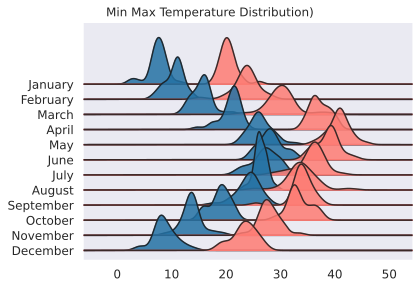

In [6]:
import warnings
from datetime import date, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joypy import joyplot  # 'joypy' 라이브러리가 설치되어 있어야 합니다.
from pandas.api.types import CategoricalDtype

# 경고 메시지 무시 (디버깅 시에는 주석 처리하는 것이 좋습니다)
warnings.filterwarnings("ignore")

# --- 더미 데이터 (가상 데이터) 정의 ---

# 월별 평균 기온 및 표준 편차
max_temps = [20.5, 24.6, 30.4, 36.9, 40.9, 39, 35.8, 34.5, 34.3, 33.1, 28.3, 23]
# min_temps 리스트의 불필요한 마지막 13번째 값(19)을 제거했습니다.
min_temps = [7.6, 10.8, 15.7, 21.3, 25.6, 27.6, 27.3, 26.6, 24.9, 19.3, 12.9, 8.3]
std_devs = [1, 2, 3]  # 무작위로 선택할 표준 편차
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]


# --- 데이터 생성 (리팩토링됨) ---
# df.append() 대신, 리스트에 딕셔너리를 추가한 후 DataFrame을 한 번에 생성합니다.

# 데이터를 저장할 빈 리스트 초기화
data_list = []

# 1년 치 각 날짜에 대한 데이터 생성
start_date = date(2023, 1, 1)
end_date = date(2023, 12, 31)
current_date = start_date

while current_date <= end_date:
    # 리스트 인덱싱을 위해 월을 0부터 시작하도록 조정 (1월 -> 0)
    month_index = current_date.month - 1

    # 정규 분포를 따르는 임의의 최고/최저 기온 생성
    max_temp = np.random.normal(max_temps[month_index], std_devs[np.random.randint(0, 3)])
    min_temp = np.random.normal(min_temps[month_index], std_devs[np.random.randint(0, 3)])

    # 데이터를 딕셔너리 형태로 리스트에 추가
    data_list.append(
        {
            "Day": current_date.day,
            "Month": months[month_index],
            "min_temp": min_temp,
            "max_temp": max_temp,
        }
    )

    # 다음 날짜로 이동
    current_date += timedelta(days=1)

# 루프 종료 후, 리스트로부터 DataFrame을 한 번에 생성
df = pd.DataFrame(data_list)

# 'Month' 컬럼을 월 순서대로 정렬되는 범주형(Categorical) 타입으로 변환
# (플롯팅 시 월 순서를 보장하기 위함)
month_dtype = CategoricalDtype(categories=months, ordered=True)
df["Month"] = df["Month"].astype(month_dtype)


# --- Joy Plot (능선도) 생성 ---

# joyplot이 (Figure, Axes) 객체를 반환합니다. (순서 수정: fig, ax)
# 불필요한 plt.figure() 호출을 제거했습니다.
fig, ax = joyplot(
    data=df[["min_temp", "max_temp", "Month"]],
    by="Month",  # 'Month'를 기준으로 그룹화
    column=["min_temp", "max_temp"],  # 플롯을 그릴 컬럼들
    color=["#2471A3", "#fe7c73"],  # 각 컬럼에 대한 색상
    #     legend=True,                         # 범례 (필요시 주석 해제)
    alpha=0.85,  # 투명도
    figsize=(6, 4),  # Figure 크기
)

# Figure 전체의 제목 설정 (plt.title 대신 사용)
fig.suptitle("Min Max Temperature Distribution)", fontsize=12, y=1.01)  # y 값으로 제목 위치 조정

plt.show()

# 결측 데이터를 위한 [kNN 대체법](https://blog.dailydoseofds.com/p/missforest-and-knn-imputation-for)

데이터 사이언스에서 결측치(missing data)에 대한 대체(imputation) 전략은 결측의 유형에 크게 좌우되며, 결측 유형에는 세 가지가 있습니다:

1. MCAR (완전 무작위 결측): 데이터가 진정으로 무작위하게 누락되었으며, 관측된 변수나 관측되지 않은 변수와 아무런 관련이 없는 경우입니다.
2. MAR (무작위 결측): 특정 피처(feature)의 결측이 데이터셋의 다른 관측된 피처들에 의해 설명될 수 있는 경우입니다.
3. MNAR (비무작위 결측): 결측이 결측값 자체 또는 우리가 데이터를 수집하지 않은 피처(들)에 기인하는 경우입니다.

저는 실제 상황에서 다른 두 유형보다 MAR (무작위 결측)이 상대적으로 훨씬 더 많이 나타나는 것을 관찰했습니다. 그래서 여기에서는 제가 주로 사용하는 kNN 대체법을 공유하고자 합니다.

## kNN 대체법(kNN imputation)

이 방법은 k-최근접 이웃(k-nearest neighbors) 알고리즘을 사용하여 결측값을 대체합니다. 구체적으로는 결측이 아닌 피처 값들에 kNN을 실행하여 결측된 피처를 대체하며 아래의 단계를 따릅니다.

- 1단계: 결측값이 있는 행 (r)을 선택합니다.
- 2단계: 결측이 아닌 피처 값들을 사용하여 해당 행의 k개의 최근접 이웃을 찾습니다.
- 3단계: k개의 최근접 이웃 행들에 해당하는 (결측이 아닌) 값들을 사용하여 행 (r)의 결측된 피처를 대체합니다.
- 4단계: 결측값이 있는 모든 행에 대해 반복합니다.

## 여러 결측치 대체 방법을 비교하는 시각화

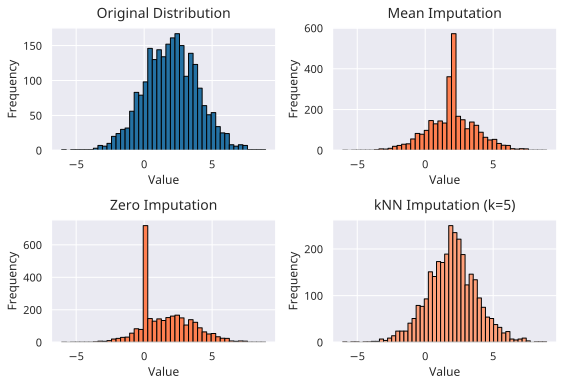

In [7]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer

# 경고 메시지 무시
warnings.filterwarnings("ignore")
sns.set()

# 플롯을 위한 기본 설정
plt.rcParams["font.family"] = ["Noto Sans", "sans-serif"]
colors = [
    "#fe7c73",
    "#2471A3",
    "#3498DB",
    "#27AE60",
    "#82E0AA",
    "#D35400",
    "#5D6D7E",
    "#E74C3C",
    "#21618C",
    "#B7950B",
    "#46C7C7",
    "#00B9FF",
    "#FF7051",
    "orange",
    "darkorange",
    "tomato",
    "coral",
    "limegreen",
    "lightsalmon",
]

# --- 1. 결측치가 포함된 더미 데이터셋 생성 ---
size = 1000
data = np.random.normal(loc=2, scale=2, size=(size, 3))  # 정규분포를 따르는 무작위 데이터 생성
mask = np.random.rand(size, 3) < 0.2  # 20% 확률로 결측치를 만들기 위한 마스크(mask) 생성
data[mask] = np.nan  # 마스크를 적용하여 결측치(NaN) 설정

# --- 2. 다양한 방법으로 결측치 대체 ---

# 평균값 대체(Mean Imputation)
mean_imputer = SimpleImputer(strategy="mean")
data_imputed_mean = mean_imputer.fit_transform(data)

# 0으로 대체(Zero Imputation)
zero_imputer = SimpleImputer(strategy="constant", fill_value=0)
data_imputed_zero = zero_imputer.fit_transform(data)

# kNN 대체 (n_neighbors=5)
knn_imputer = KNNImputer(n_neighbors=5)
data_imputed_knn = knn_imputer.fit_transform(data)

# --- 3. Subplot을 사용하여 4개의 플롯을 하나로 합치기 ---

# 2x2 서브플롯 그리드(grid) 생성. figsize로 전체 크기 조절
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# (0, 0) 위치: 원본 데이터 분포
axes[0, 0].hist(data.flatten(), bins=45, edgecolor="black", color=colors[1])
axes[0, 0].set_title("Original Distribution", size=14, pad=10)
axes[0, 0].set_xlabel(
    "Value",
    size=12,
)
axes[0, 0].set_ylabel(
    "Frequency",
    size=12,
)

# (0, 1) 위치: 평균값 대체(Mean Imputation) 분포
axes[0, 1].hist(data_imputed_mean.flatten(), bins=45, edgecolor="black", color=colors[16])
axes[0, 1].set_title("Mean Imputation", size=14, pad=10)
axes[0, 1].set_xlabel(
    "Value",
    size=12,
)
axes[0, 1].set_ylabel(
    "Frequency",
    size=12,
)

# (1, 0) 위치: 0으로 대체(Zero Imputation) 분포
axes[1, 0].hist(data_imputed_zero.flatten(), bins=45, edgecolor="black", color=colors[16])
axes[1, 0].set_title("Zero Imputation", size=14, pad=10)
axes[1, 0].set_xlabel(
    "Value",
    size=12,
)
axes[1, 0].set_ylabel(
    "Frequency",
    size=12,
)

# (1, 1) 위치: kNN 대체(kNN Imputation) 분포
axes[1, 1].hist(data_imputed_knn.flatten(), bins=50, edgecolor="black", color=colors[18])
axes[1, 1].set_title("kNN Imputation (k=5)", size=14, pad=10)
axes[1, 1].set_xlabel(
    "Value",
    size=12,
)
axes[1, 1].set_ylabel(
    "Frequency",
    size=12,
)

# 레이아웃 자동 조정 (메인 제목과 겹치지 않도록 rect 파라미터로 상단 여백 확보)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# 모든 플롯을 한 번에 표시
plt.show()

위 결과를 보면 평균(mean) 대체 또는 0(zero) 대체 대비 kNN 대체가 갖는 효과는 위 시각화에서 명확하게 드러납니다. 왼쪽 위에는 결측값이 있는 피처의 분포가 있습니다. 데이터가 MAR(무작위 결측)임을 이미 검증했다고 가정할 때 아래 그림과 같이 평균/0 대체를 사용하면 요약 통계량과 분포가 변경됩니다. 하지만 오른쪽 아래 그림에서 보듯이 kNN 대체(imputer)는 더 신뢰할 수 있는 것으로 보이며 요약 통계량을 보존하고 있습니다.


# Reference

- Daily Dose of Data Science: [Enrich Matplotlib Plots with Annotations](https://blog.dailydoseofds.com/p/enrich-matplotlib-plots-with-annotations)